In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Exploration des données train.csv (House Price)


## Lecture des données 

In [6]:
data=pd.read_csv("train.csv")

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
 data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Description des colonnes (81):
* Id: numero de maison
* MSSubClass: Type de complexe de vente
* MSZoning: zone de classification de vente
* LotFrontage: la route  qui mene à la maison
* LotArea: Place occupé par la maison
* street: Type de route 
* Alley: Type de ruelle
* LotShape: Forme générale de la propriété
* LandContour: platitude de la propriété
* Saleprice: prix de vente de la propriété

## Statistiques descriptives

In [24]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### on constate pour les prix des propriétés que:
* la moyenne est 180 921.195890
* le minimum est 34 900
* le maximum est 755 000

In [45]:
corr=data.corr()["SalePrice"]
corr[np.argsort(corr)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

##### La correlation entre les données et le 'SalePrice':<hr>
* SalePrice et les colonnes suivantes sont positivements correlés: 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch'
* SalePrice et les colonnes suivantes sont négativements correlés: 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'
* Vue la tri:
    * 'OverallQual':le prix des propriétés dépend de la classification de l'apparence de chaque propriété(plus la maison est de bonne apparence plus le prix augmente)
    * 'KitchenAbvGr':le 'SalePrice' n'a aucun liaison avec la variation du colonne 'kitchenAbvGr

In [46]:
data[['OverallQual','SalePrice']].groupby(['OverallQual']).describe()

SalePrice                                                    \
                count           mean            std       min       25%   
OverallQual                                                               
1                 2.0   50150.000000   15344.217152   39300.0   44725.0   
2                 3.0   51770.333333   14254.200796   35311.0   47655.5   
3                20.0   87473.750000   24688.567399   37900.0   75500.0   
4               116.0  108420.655172   29022.003886   34900.0   88000.0   
5               397.0  133523.347607   27107.330927   55993.0  118000.0   
6               374.0  161603.034759   36090.182933   76000.0  139125.0   
7               319.0  207716.423197   44466.259414   82500.0  179470.0   
8               168.0  274735.535714   63898.902253  122000.0  234557.5   
9                43.0  367513.023256   81278.174849  239000.0  318980.5   
10               18.0  438588.388889  159785.491058  160000.0  349375.0   

                                           
                  50%       75%       max  
OverallQual                                
1             50150.0   55575.0   61000.0  
2             60000.0   60000.0   60000.0  
3             86250.0   97500.0  139600.0  
4            108000.0  125500.0  256000.0  
5            133000.0  147000.0  228950.0  
6            160000.0  181000.0  277000.0  
7            200141.0  230750.0  383970.0  
8            269750.0  306250.0  538000.0  
9            345000.0  389716.0  611657.0  
10           432390.0  472875.0  755000.0

#### comme on a vu tout alleur,le prix dépend de la classement de l'aspect de la maison mais le tableau ci-dessus ,
#### on y voit nèttement les détailles et aussi un autre constatation que les maisons de classe 4 à 8 sont les plus nombreux 
#### et avec un prix proche de la moyenne 180 921.195890
###### les listes des classements:
* 10 Very Excellent
* 9	Excellent
* 8	Very Good
* 7	Good
* 6	Above Average
* 5	Average
* 4	Below Average
* 3	Fair
* 2	Poor
* 1	Very Poor



In [51]:
data[['Fireplaces','SalePrice']].groupby(['Fireplaces']).describe()

SalePrice                                                    \
               count           mean            std       min       25%   
Fireplaces                                                               
0              690.0  141331.482609   44389.786884   34900.0  112000.0   
1              650.0  211843.909231   79531.825318   60000.0  158000.0   
2              115.0  240588.539130  117451.800525  100000.0  160750.0   
3                5.0  252000.000000   93313.986090  160000.0  190000.0   

                                          
                 50%       75%       max  
Fireplaces                                
0           135000.0  164375.0  342643.0  
1           189975.0  254675.0  625000.0  
2           206900.0  284500.0  755000.0  
3           205000.0  345000.0  360000.0

* on peut voir par ce tableau ci-dessus que le nombre de cheminé peut aussi augmenter le prix d'une maison

In [53]:
data[['GarageCars','SalePrice']].groupby(['GarageCars']).describe()

SalePrice                                                    \
               count           mean            std       min       25%   
GarageCars                                                               
0               81.0  103317.283951   32815.023389   34900.0   82500.0   
1              369.0  128116.688347   30412.386890   35311.0  110000.0   
2              824.0  183851.663835   51617.144258   55993.0  148000.0   
3              181.0  309636.121547  106832.925939   81000.0  246578.0   
4                5.0  192655.800000   52621.839745  123000.0  168000.0   

                                          
                 50%       75%       max  
GarageCars                                
0           100000.0  124000.0  200500.0  
1           128000.0  142000.0  266500.0  
2           177750.0  213000.0  430000.0  
3           295000.0  367294.0  755000.0  
4           200000.0  206300.0  265979.0

* on a vue que 'GarageCars' est positivement correlés avec le prix donc la capacité du garage de la maison peut augmenter aussi sont prix

## Corelation

In [63]:
cor=data.corr()

<AxesSubplot:>

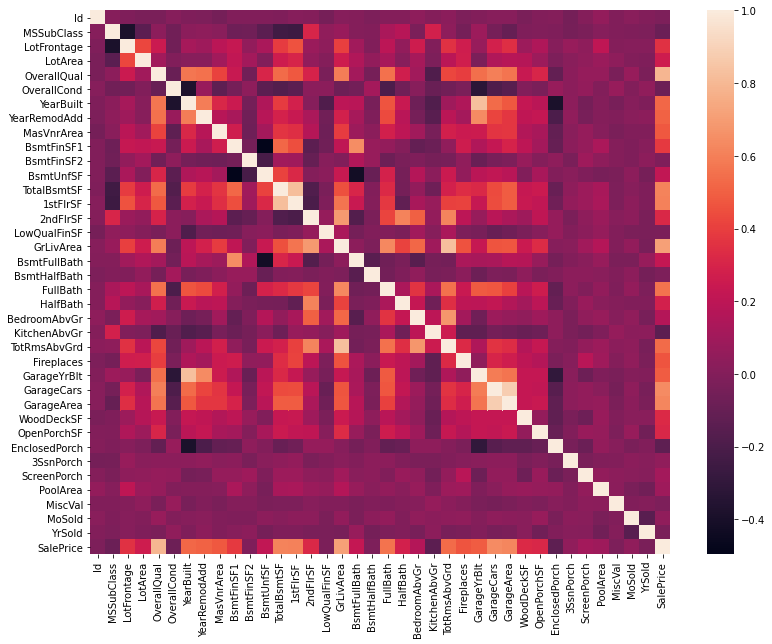

In [65]:
f, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cor)

* C'est comme dans la statistique mais ici on le voi

## Visualisation

C:\Users\RAKOTONDRAINIBE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAKOTONDRAINIBE\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


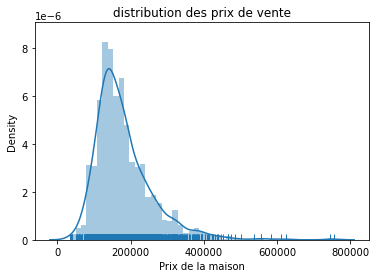

In [43]:
sns.distplot(data['SalePrice'], kde=True,rug=True)
plt.title("distribution des prix de vente")
plt.xlabel("Prix de la maison");

* on une graphe unimodale et non symétrique , le maximun est 7

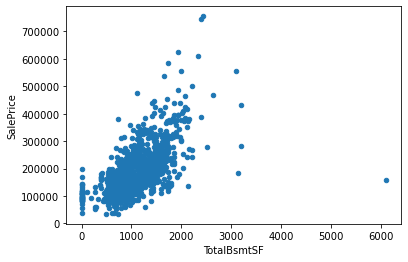

In [36]:
data.plot.scatter(x='TotalBsmtSF', y='SalePrice');

* le prix varie avec la superficie de la maison jusqu'à la superficie 3 000
* à 6 000 superficie le prix est entre [100 000;200 000] C'est qui est à environ 2 fois du minimum de prix
* les maisons de superficie entre [0; 2 000] et avec un prix [0;300 000] sont beaucoup plus nombreux

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

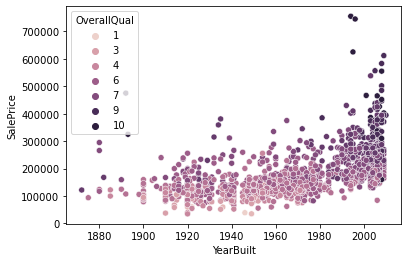

In [42]:
sns.scatterplot(x="YearBuilt",y="SalePrice",hue="OverallQual",data=data)

* on y voit dans cette figure que meme si les maisons sontt récemments contruisent ,ils peuvent toujours ressembler aux autres maisons anciennes mais la classe y comtpe aussi pour augmenter leurs prix.
* les maisons de classe supérieure sont nombreux chez les maisons récemment contruisent. 

Text(0.5, 1.0, 'Electrical et SalePrice ')

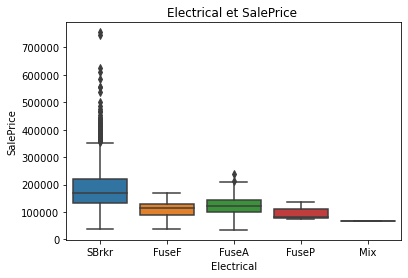

In [45]:
sns.boxplot(x="Electrical",y="SalePrice",data=data)
plt.title("Electrical et SalePrice ")

#### Système de circuit:
* Standard Circuit Breakers & Romex:le prix est moins de 300 000 et plus de 100 000
* 60 AMP Fuse Box and mostly Romex wiring (Fair):le prix est moins de 200 000 
* Fuse Box over 60 AMP and all Romex wiring (Average): le prix est moins de 200 000 et plus de 100 000 
* FuseP: le prix est moins de 200 000 et plus de 100 000
* Mix : le prix est moins de 100 000

<AxesSubplot:xlabel='année de construction', ylabel='SalePrice'>

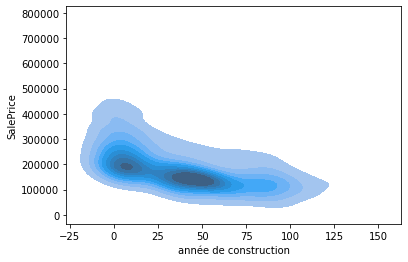

In [51]:
data['année de construction']=data["YrSold"]-data["YearBuilt"]
sns.kdeplot(data=data,x="année de construction",y="SalePrice",fill=True)

* les maisons les plus récents sont les plus chèrs sur le marché
* il n'y a pas de maison plus de 125 ans dans le marché
* les maisons de 50 ans et de pris [100 000;200 000] sont beaucoup plus nombreux sur le marché

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

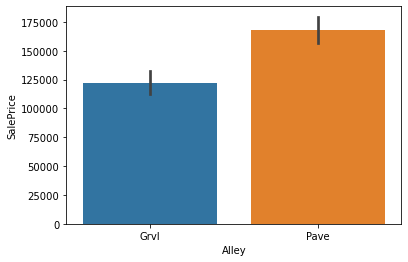

In [47]:
sns.barplot(data=data,x="Alley",y="SalePrice")

* les maisons qui ont un rue en Gravel ont un prix à environ de 125 000
* les maisons qui ont un rue en Pave ont un prix à environ de 175 000

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

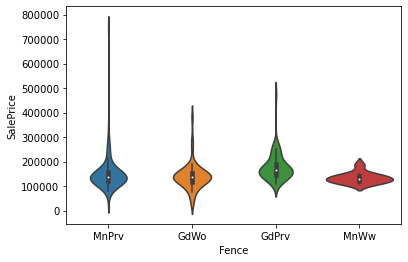

In [54]:
sns.violinplot(x=data["Fence"],y=data["SalePrice"])

* les maisons cloturés en GdPrv et en MnPrv sont beaucoup plus sur le marché
* les maisons cloturés en MnWw sont beaucoup plus nombreux sur le marché 